In [191]:
from sklearn.datasets import load_iris

In [192]:
import numpy as np

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
from sklearn.neighbors import KNeighborsClassifier 

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

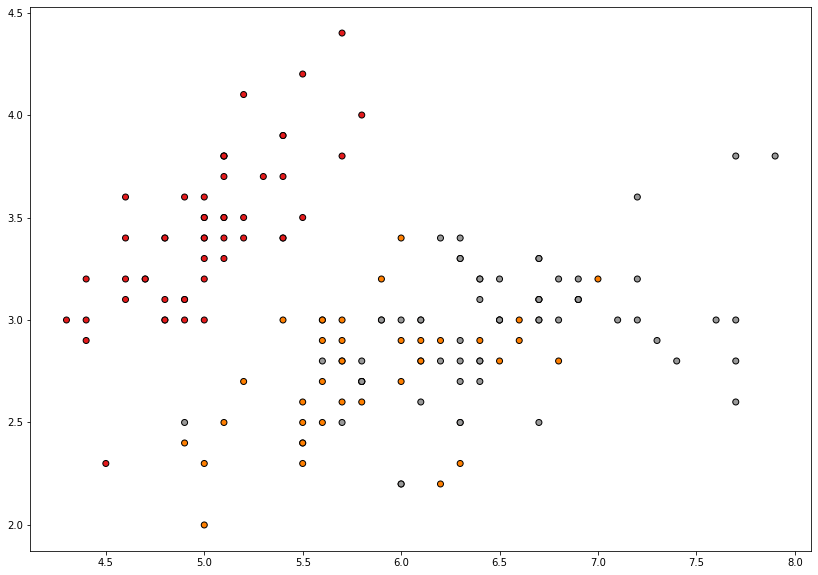

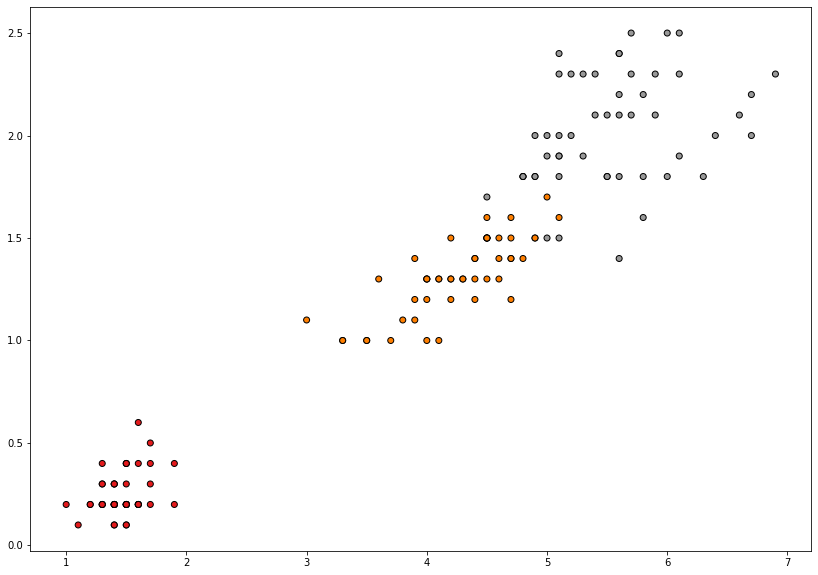

In [198]:
import seaborn as sns
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'],
                cmap=plt.cm.Set1, edgecolor='k')
plt.show()
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris_df['target'],
                cmap=plt.cm.Set1, edgecolor='k')
plt.show()

In [199]:
iris = load_iris()
idf = pd.DataFrame(iris.data, columns=iris.feature_names)
tdf = pd.DataFrame(iris.target, columns=['target'])

#X_train, X_test, y_train, y_test = train_test_split(idf, tdf, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(idf, tdf, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(idf, tdf, random_state=12)

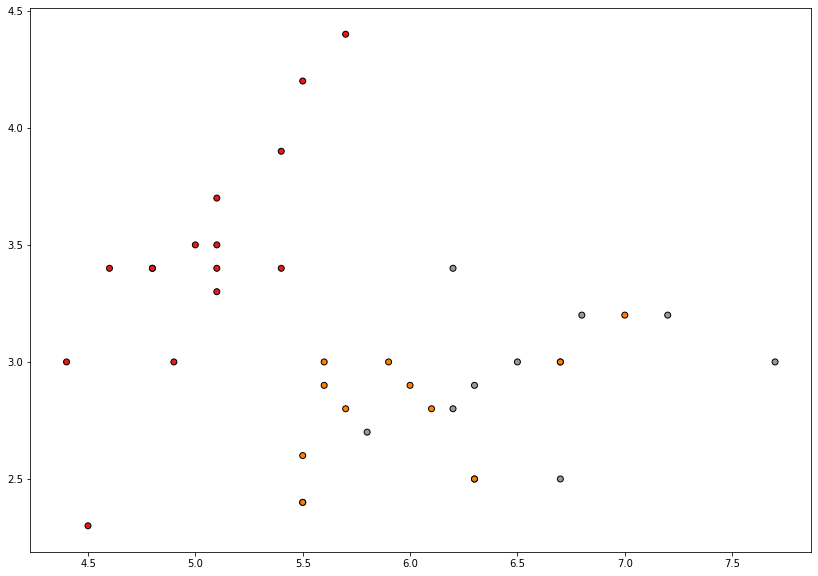

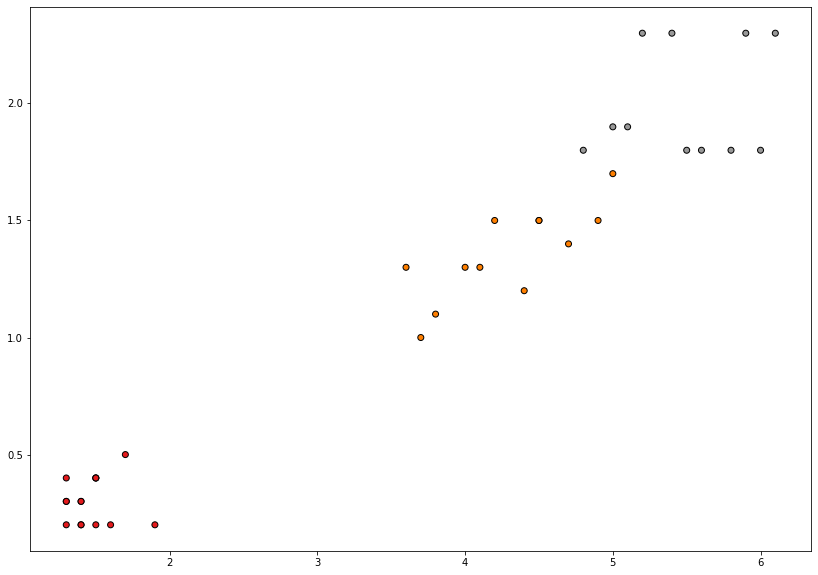

In [200]:
import seaborn as sns
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test['target'], cmap=plt.cm.Set1,
            edgecolor='k')
plt.show();
plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=y_test['target'], cmap=plt.cm.Set1,
            edgecolor='k')
plt.show();

In [201]:
knn = KNeighborsClassifier(n_neighbors=1)

In [202]:
knn.fit(X_train, y_train)

/home/guru/bin/python_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [203]:
knn.predict(X_test) -  y_test.to_numpy().flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [204]:
test_df = pd.DataFrame(X_test, columns=iris.feature_names)
test_df['target'] = y_test
test_df['predicted'] = knn.predict(X_test)
test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predicted
40,5.0,3.5,1.3,0.3,0,0
146,6.3,2.5,5.0,1.9,2,2
38,4.4,3.0,1.3,0.2,0,0
99,5.7,2.8,4.1,1.3,1,1
143,6.8,3.2,5.9,2.3,2,2


In [205]:
#test_df.where(test_df['predicted'] != test_df['target'])
test_df.where(test_df['predicted'] != test_df['target']).dropna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predicted
72,6.3,2.5,4.9,1.5,1.0,2.0


In [206]:
cross_val_score(knn, X_test, y_test, cv=5)

/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:5

array([1.        , 0.875     , 0.85714286, 1.        , 1.        ])

In [207]:
knn.score(X_test, y_test)

0.9736842105263158

In [208]:
from sklearn import svm
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
svc.score(X_test, y_test)

/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [209]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
rbf_svc.score(X_test, y_test)

/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9736842105263158

In [210]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
lin_svc.score(X_test, y_test)

/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

In [215]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
poly_svc.score(X_test, y_test)

/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9473684210526315

In [212]:
poly_svc = svm.SVC(kernel='poly', degree=9, C=C).fit(X_train, y_train)
poly_svc.score(X_test, y_test)

/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9736842105263158

In [213]:
poly_svc = svm.SVC(kernel='poly', degree=1, C=C).fit(X_train, y_train)
poly_svc.score(X_test, y_test)

/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guru/bin/python_3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9736842105263158

In [216]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9736842105263158